In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'Plasticity_Rule_test'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.00000001,0.00000001     # offset in nA
                                               ,0.0,0.0 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],5000,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(5.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_Synapses_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current = <PC_Uncoupled_STDP.I_intrinsic: array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]) * namp>
nr of noise is 2
offset [1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08
 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]


WARNING    C:\Users\thoed\OneDrive\Documenten\Universiteit_Delft\master\TheModelPlasticity\ModelPlasticity\E_Synapses_Plasticity.py:132: RuntimeWarning: invalid value encountered in true_divide
  reshaped_weight = norm_coupled/ column_sum[np.newaxis,:]
 [py.warnings]


final static weights STDP [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


offset [1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08
 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]
final static weights uncoupled STDP [0.52631579 0.47368421 0.47058824 0.46666667 0.46153846 0.45454545
 0.44444444 0.42857143 0.4        0.33333333 0.47368421 0.52631579
 0.52941176 0.53333333 0.53846154 0.54545455 0.55555556 0.57142857
 0.6        0.66666667]
Synapses(clock=Clock(dt=25. * usecond, name='dummy_PC_Uncoupled_clock'), when=start, order=0, name='dummy_PC_Uncoupled')


In [5]:
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 5. s
0.44195 s (8%) simulated in 10s, estimated 1m 43s remaining.
0.8958 s (17%) simulated in 20s, estimated 1m 32s remaining.
1.34185 s (26%) simulated in 30s, estimated 1m 22s remaining.
1.8116 s (36%) simulated in 40s, estimated 1m 10s remaining.
2.2834 s (45%) simulated in 50s, estimated 1m 0s remaining.
2.741925 s (54%) simulated in 1m 0s, estimated 49s remaining.
3.213275 s (64%) simulated in 1m 10s, estimated 39s remaining.
3.672 s (73%) simulated in 1m 20s, estimated 29s remaining.
4.134075 s (82%) simulated in 1m 30s, estimated 19s remaining.
4.598175 s (91%) simulated in 1m 40s, estimated 9s remaining.
5. s (100%) simulated in 1m 48s


In [6]:
#run(exp_runtime,report='text')

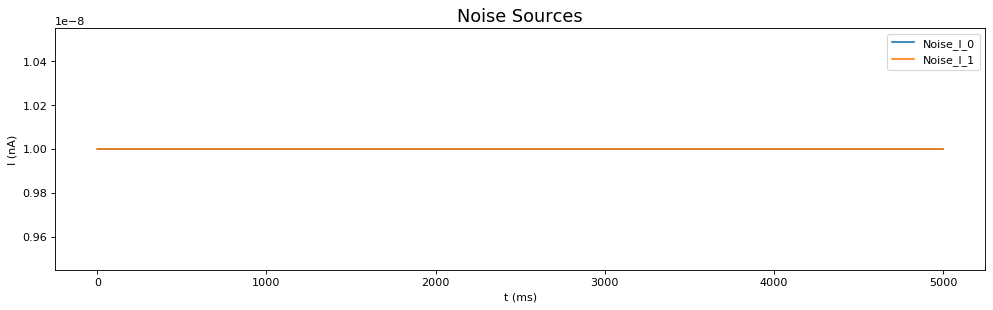

Plasticity


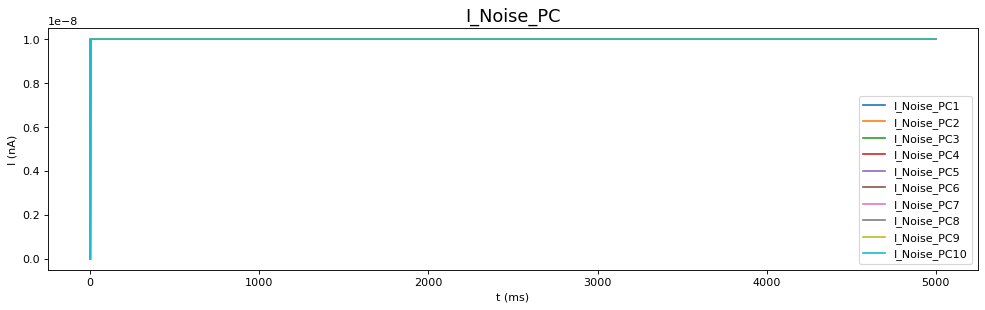

Plasticity Coupled Scenario


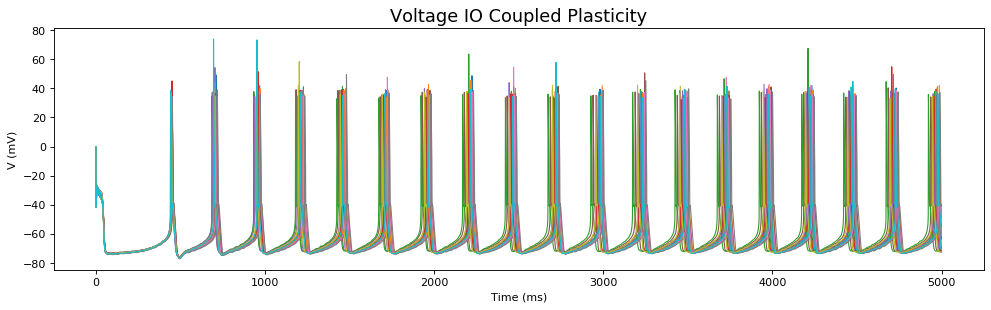

Number of spikes DCN: 170
Number of spikes DCN: 205
Number of spikes DCN: 185
Number of spikes DCN: 169
Number of spikes DCN: 155
Number of spikes DCN: 177
Number of spikes DCN: 194
Number of spikes DCN: 180
Number of spikes DCN: 170
Number of spikes DCN: 201


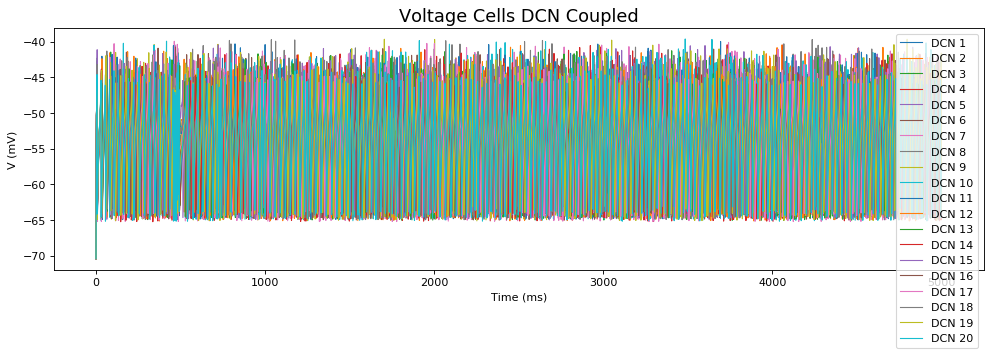

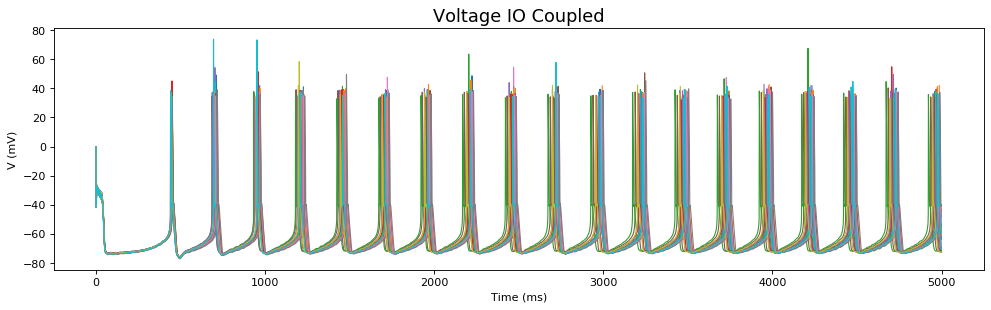

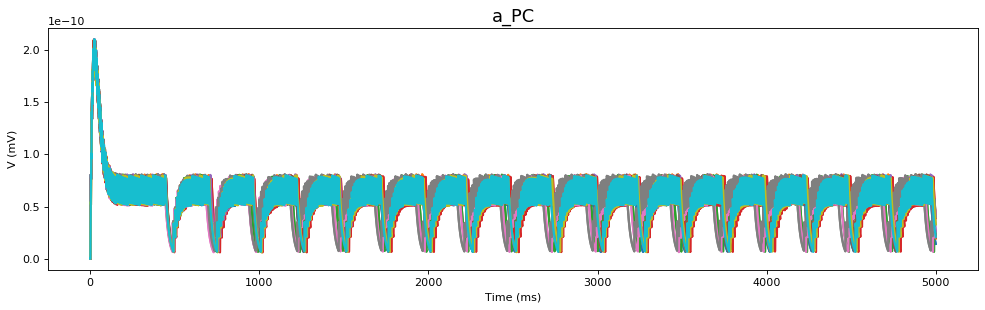

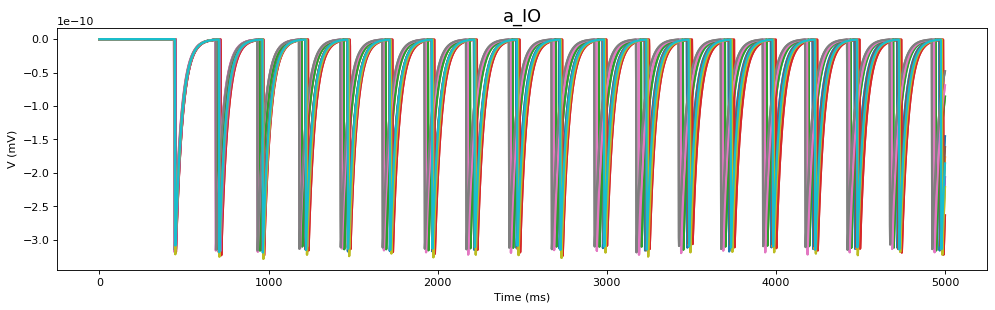

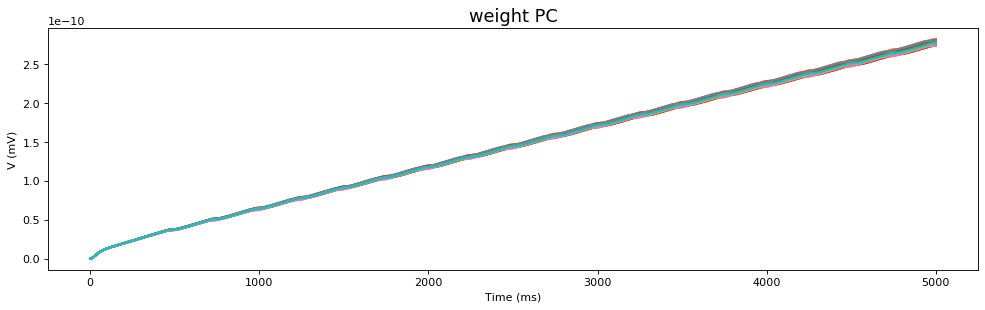

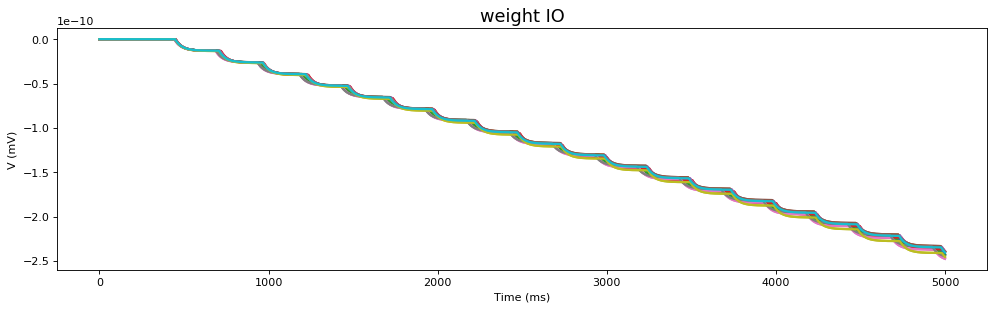

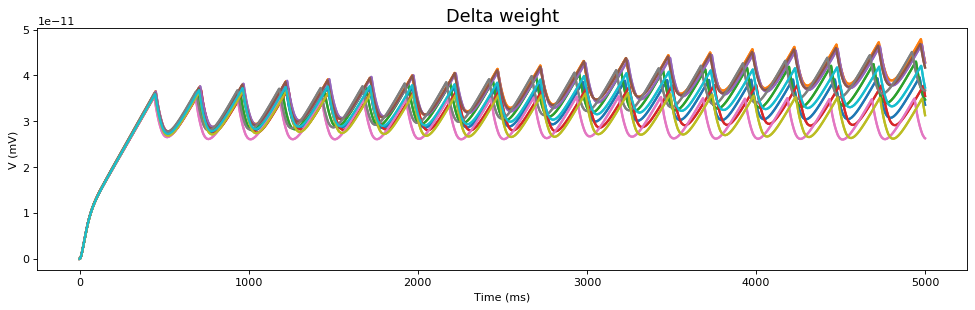

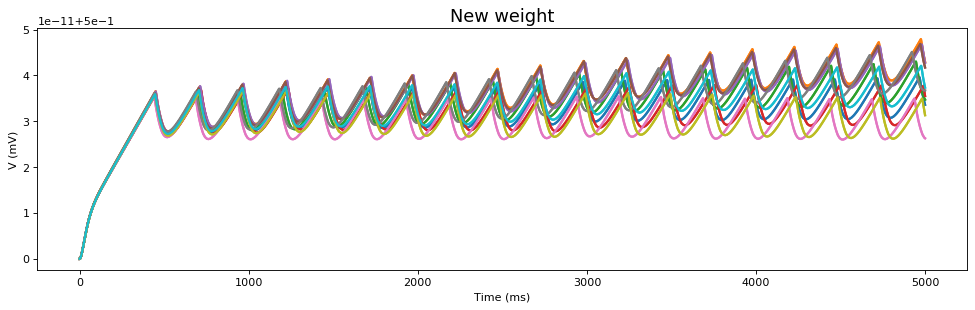

Plasticity Uncoupled Scenario


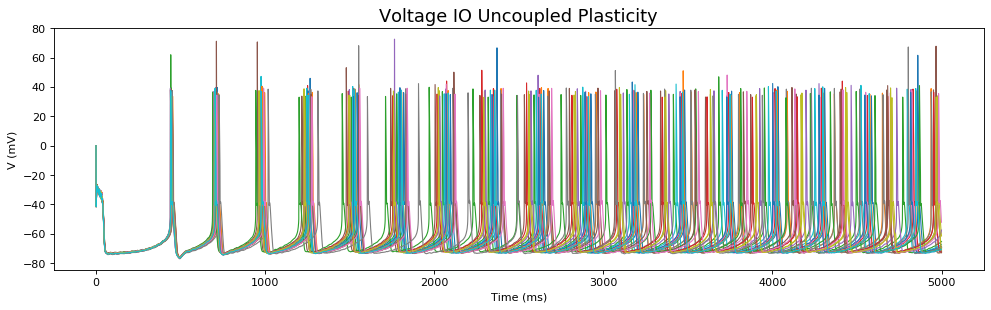

Number of spikes DCN: 158
Number of spikes DCN: 204
Number of spikes DCN: 180
Number of spikes DCN: 167
Number of spikes DCN: 151
Number of spikes DCN: 172
Number of spikes DCN: 193
Number of spikes DCN: 171
Number of spikes DCN: 166
Number of spikes DCN: 198


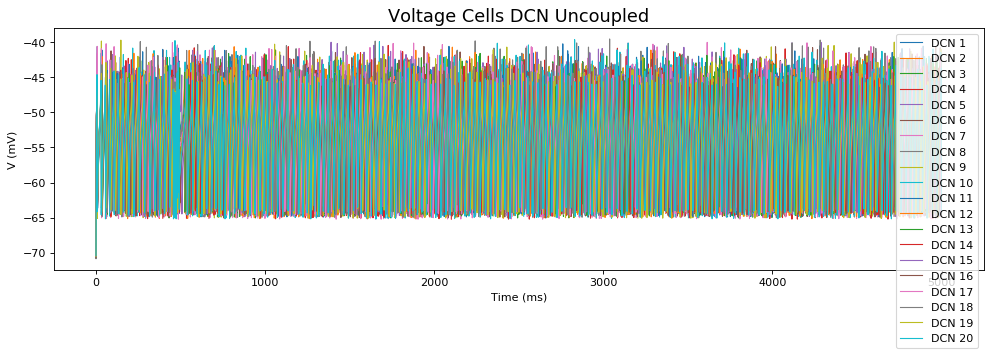

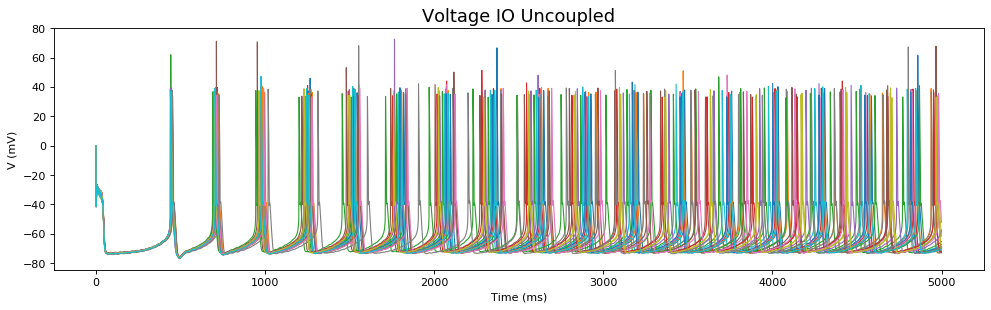

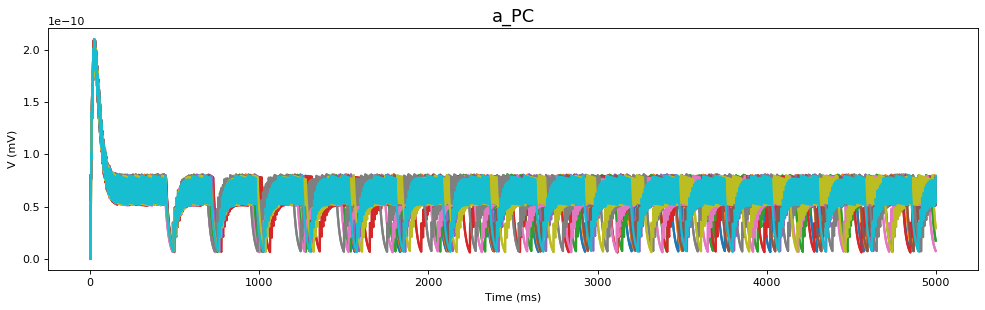

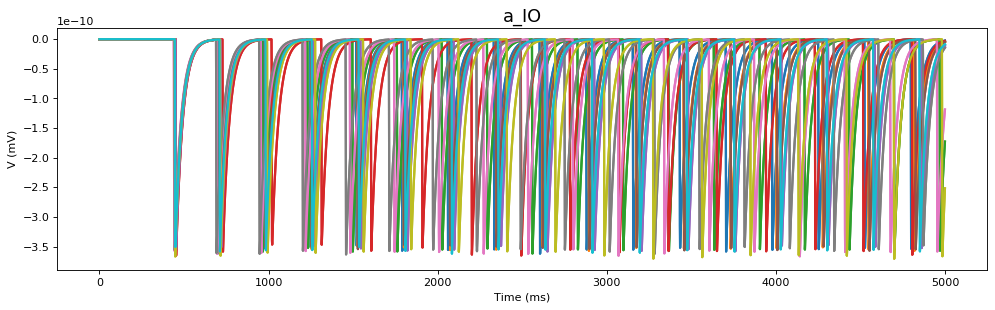

<Figure size 1200x320 with 0 Axes>

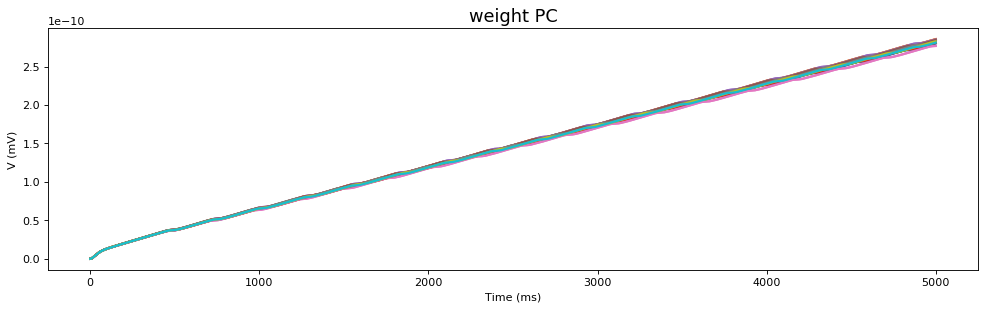

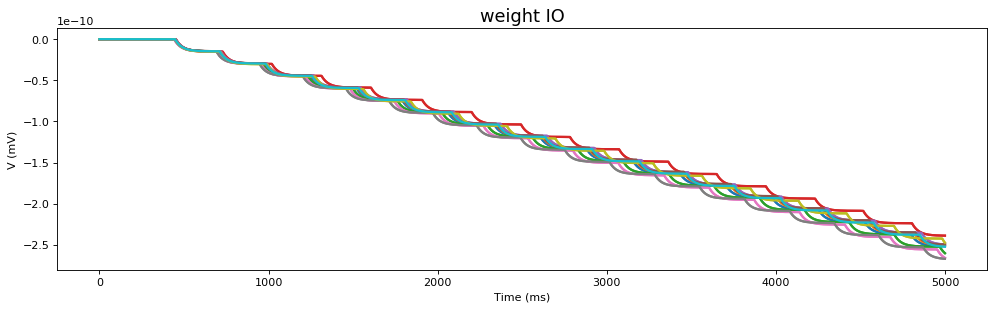

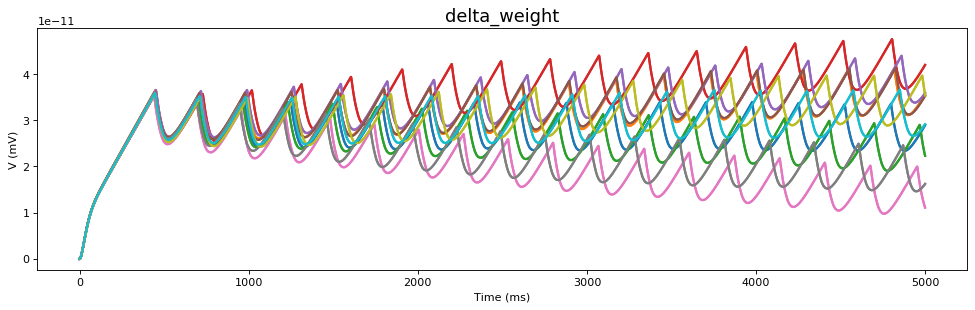

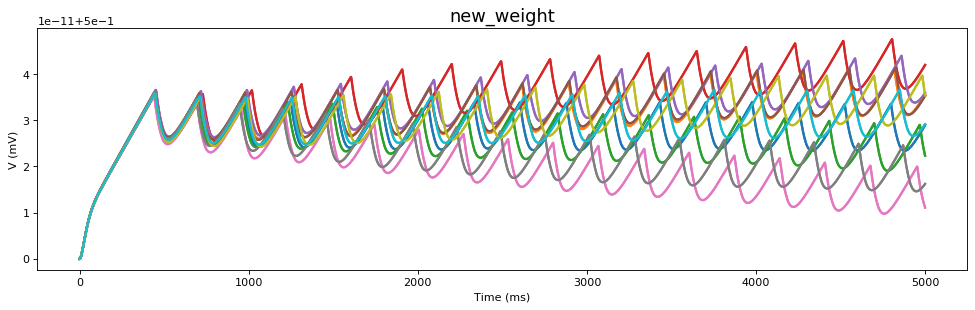

In [7]:
from G_Plot_Plasticity import *

In [8]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved
population rates saved


In [9]:
#from G_Plot_Plasticity import *

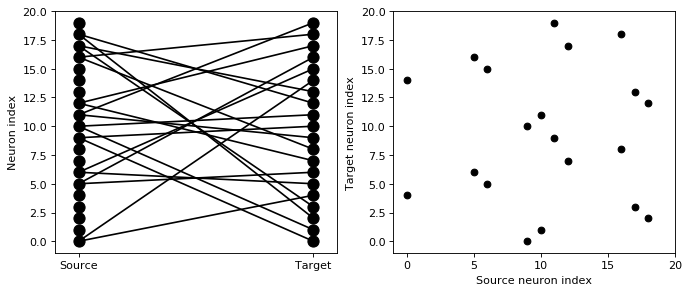

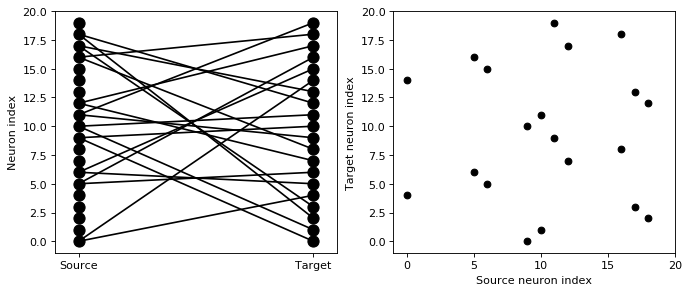

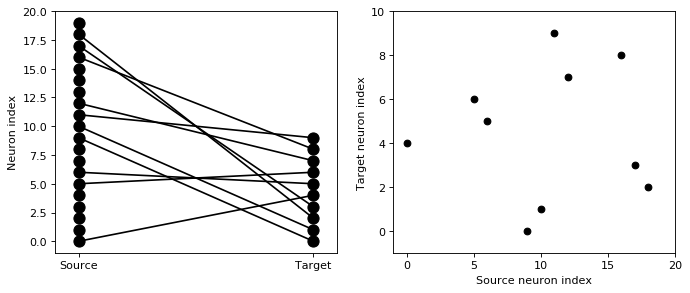

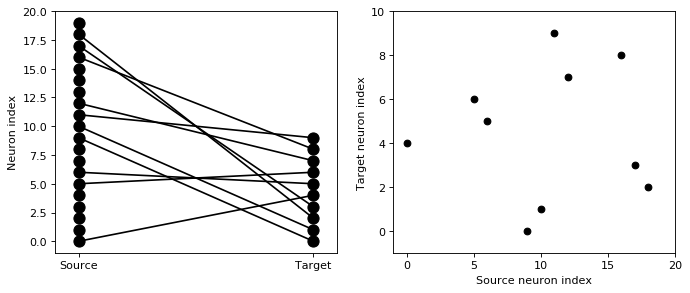

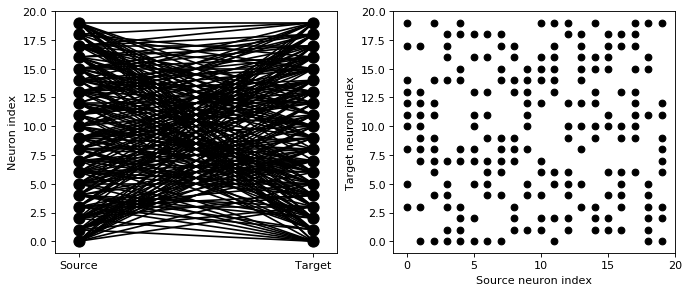

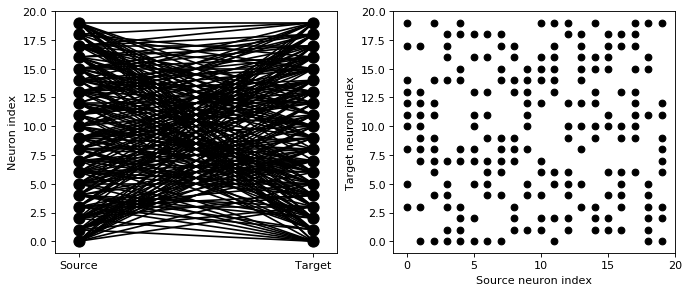

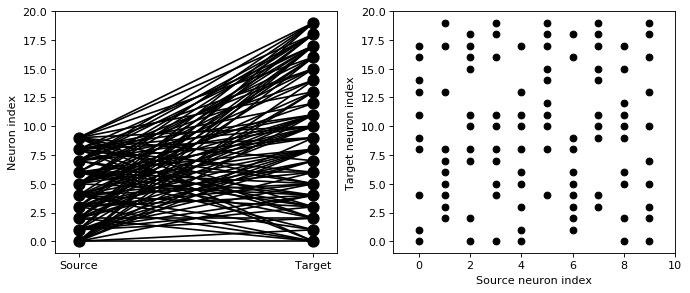

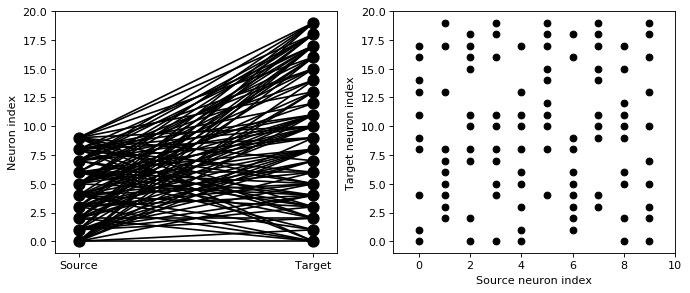

In [10]:
visualise(S_IO_N_Coupled)
visualise(S_IO_N_Uncoupled)

#visualise(Synapse_IO_PC_Coupled_noSTDP)
#visualise(Synapse_IO_PC_Uncoupled_noSTDP)
visualise(Synapse_IO_PC_Coupled_STDP)
visualise(Synapse_IO_PC_Uncoupled_STDP)

#visualise(IO_DCN_Synapse_Coupled_noSTDP)
#visualise(IO_DCN_Synapse_Uncoupled_noSTDP)
visualise(IO_DCN_Synapse_Coupled_STDP)
visualise(IO_DCN_Synapse_Uncoupled_STDP)

#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTDP)
visualise(DCN_PC_Synapse_Coupled_STDP)
visualise(DCN_PC_Synapse_Uncoupled_STDP)

In [11]:
from F_save_data_Plasticity import *